## hetrec2011-lastfm-2k EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

/Users/polina/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### user_artists.dat
This file contains the artists listened by each user.
        
It also provides a listening count for each [user, artist] pair

userID \t artistID \t weight
2	51	13883

In [3]:
user_artists = pd.read_csv("/Users/polina/study/THESIS/recommender-system/data/raw/hetrec2011-lastfm-2k/user_artists.dat", sep="\t")

In [64]:
user_artists_report = ProfileReport(user_artists, title="User-artists dataset report")
user_artists_report.to_file("../reports/user_artists_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### user_friends.dat
These files contain the friend relations between users in the database.

userID \t friendID
2	275

In [65]:
user_friends = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/user_friends.dat", sep="\t")

In [66]:
user_friends_report = ProfileReport(user_friends, title="User-friends dataset report")
user_friends_report.to_file("../reports/user_friends_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### user_taggedartists-timestamps.dat
These files contain the tag assignments of artists provided by each particular user.
        
They also contain the timestamps when the tag assignments were done.

user_taggedartists-timestamps.dat

userID \t artistID \t tagID \t timestamp
2	52	13	1238536800000

In [67]:
user_taggedartists = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/user_taggedartists-timestamps.dat", sep="\t")

In [68]:
user_taggedartists_report = ProfileReport(user_taggedartists, title="User tagged-artists dataset report")
user_taggedartists_report.to_file("../reports/user_taggedartists_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### tags.dat
This file contains the set of tags available in the dataset.

tagID \t tagValue
1	metal

In [69]:
tags = pd.read_csv("/Users/polina/PycharmProjects/recommendation_system/recommendation-system/data/raw/hetrec2011-lastfm-2k/tags.dat", sep="\t", encoding='latin-1')

In [70]:
tags_report = ProfileReport(tags, title="Tags dataset report")
tags_report.to_file("../reports/tags_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### artists.dat
This file contains information about music artists listened and tagged by the users.

id \t name \t url \t pictureURL

Example:
707	Metallica	http://www.last.fm/music/Metallica	http://userserve-ak.last.fm/serve/252/7560709.jpg

In [13]:
artists = pd.read_csv("/Users/polina/study/THESIS/recommender-system/data/raw/hetrec2011-lastfm-2k/artists.dat", sep="\t", encoding='latin-1')

In [72]:
artists_report = ProfileReport(artists, title="Artists dataset report")
artists_report.to_file("../reports/artists_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### fixing skeweness of user_artists.weight

In [4]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [5]:
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')

In [6]:
user_artists.weight = pd.Series((qt.fit_transform(np.array(user_artists.weight).reshape(-1, 1))).flatten())

<Axes: xlabel='weight', ylabel='Count'>

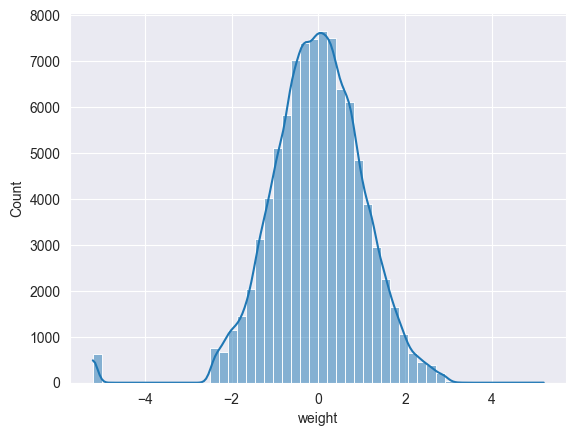

In [7]:
sns.histplot(user_artists.weight, bins = 50, kde = True)

In [9]:
user_artists.loc[user_artists["weight"] >= 0, "weight"] = 1
user_artists.loc[user_artists["weight"] < 0, "weight"] = 0

In [10]:
user_artists

,userID,artistID,weight
0,2,51,1.0
1,2,52,1.0
2,2,53,1.0
3,2,54,1.0
4,2,55,1.0
...,...,...,...
92829,2100,18726,1.0
92830,2100,18727,1.0
92831,2100,18728,1.0
92832,2100,18729,1.0


### deleting missing values from artists

In [77]:
artists = artists.dropna()

In [11]:
results = pd.read_csv("/Users/polina/study/THESIS/recommender-system/src/models/results.csv")

In [12]:
results.head()

,Unnamed: 0,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10
0,2,1001,993,187,997,193,1014,998,1013,1892,159
1,3,7032,7020,7016,7035,7014,7034,7012,7011,7010,7019
2,4,227,511,229,1001,67,1713,533,599,59,959
3,5,424,65,1090,533,418,709,429,425,436,615
4,6,9904,11083,11071,11062,11077,11064,11066,2220,11076,11070


In [20]:
artists["id"].isin([1001, 993, 187, 997, 193])

0        False
1        False
2        False
3        False
4        False
         ...  
17627    False
17628    False
17629    False
17630    False
17631    False
Name: id, Length: 17632, dtype: bool

In [15]:
artists.head()

,id,name,url,pictureURL
0,1,MALICE MIZER,http://www.last.fm/music/MALICE+MIZER,http://userserve-ak.last.fm/serve/252/10808.jpg
1,2,Diary of Dreams,http://www.last.fm/music/Diary+of+Dreams,http://userserve-ak.last.fm/serve/252/3052066.jpg
2,3,Carpathian Forest,http://www.last.fm/music/Carpathian+Forest,http://userserve-ak.last.fm/serve/252/40222717...
3,4,Moi dix Mois,http://www.last.fm/music/Moi+dix+Mois,http://userserve-ak.last.fm/serve/252/54697835...
4,5,Bella Morte,http://www.last.fm/music/Bella+Morte,http://userserve-ak.last.fm/serve/252/14789013...
